<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'>Predict Loan Eligibility for Dream Housing Finance company</h1>
</div>


#### Author:- Aniket B. Barphe
#### LinkedIn Profile:- https://www.linkedin.com/in/aniiketbarphe/
#### Platform:- Analytics Vidhya
#### Problem Statement:- Predict Loan Eligibility for Dream Housing Finance company

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Setup Environment</h2>
</div>

- Import the libraries
- Set the options for better visulization

In [149]:

# Data manipulation
import numpy as np 
import pandas as pd

# Data Visualazation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

# Machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings("ignore")

# Set options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline

plt.rcParams['figure.figsize']=(16,8)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Load Data</h2>
</div>

- Read & Load "Train" data in "train" Variable 
- Read & Load "Test" data in "test" Variable 
- Read & Load "Submission" data in "submission" Variable 

In [150]:
train = pd.read_csv('C:/Users/PC/Pictures/AV/LOAN_PRED_JUNE2022/train_ctrUa4K.csv')
test = pd.read_csv('C:/Users/PC/Pictures/AV/LOAN_PRED_JUNE2022/test_lAUu6dG.csv')
submission = pd.read_csv('C:/Users/PC/Pictures/AV/LOAN_PRED_JUNE2022/sample_submission_49d68Cx.csv')

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Overview</h2>
</div>

- Get the basic information of the data
- Check Top 5 entries of the data
- Check Bottom 5 entries of the data
- Statistical Insight of Train Dataset including Categorical Variable
- Statistical Insight of Test Dataset including Categorical Variable
- Check Null Entries in Train Dataset 
- Check Null Entries in Test Dataset 


In [151]:

print("Data Types in Train Data:-\n")
print(train.info(),'\n')

print("Shape of Train Data:-\n")
print(train.shape,'\n')

print("--------------------------------------------------------------------------------------------------------------")

print("\nData Types in Test Data:-\n")
print(test.info(),'\n')

print("\nShape of Test Data:-\n")
print(test.shape,'\n')

print("--------------------------------------------------------------------------------------------------------------")

print("\nData Types in Submission Data:-\n")
print(submission.info(),'\n')

print("\nShape of Submission Data:-\n")
print(submission.shape,'\n')

print("--------------------------------------------------------------------------------------------------------------")


Data Types in Train Data:-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None 

Shape of Train Data:-

(614, 13) 

------------------------------------------

In [152]:
print("About Train Data:-\n")
print(train.head(),'\n')
print("--------------------------------------------------------------------------------------------------------------")

print("\nAbout Test Data:-\n")
print(test.head(),'\n')
print("--------------------------------------------------------------------------------------------------------------")

print("\nAbout Submission Data:-\n")
print(submission.head(),'\n')

About Train Data:-

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  


In [153]:
print("About Train Data:-\n")
print(train.tail(),'\n')
print("--------------------------------------------------------------------------------------------------------------")

print("\nAbout Test Data:-\n")
print(test.tail(),'\n')
print("--------------------------------------------------------------------------------------------------------------")

print("\nAbout Submission Data:-\n")
print(submission.tail(),'\n')

About Train Data:-

      Loan_ID  Gender Married Dependents Education Self_Employed  \
609  LP002978  Female      No          0  Graduate            No   
610  LP002979    Male     Yes         3+  Graduate            No   
611  LP002983    Male     Yes          1  Graduate            No   
612  LP002984    Male     Yes          2  Graduate            No   
613  LP002990  Female      No          0  Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
609             1.0         Rural           Y  
610             1.0         Rural   

In [154]:
train.describe(include='all')  
# Below Line will provide Statistical Insight of data for Numerical Variable Only
# train.describe()  

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002082,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [155]:
test.describe(include='all')

# Below Line will provide Statistical Insight of data for Numerical Variable Only
# test.describe()  

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,367,356,367,357,367,344,367.000000,367.000000,362.000000,361.000000,338.000000,367
unique,367,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3
top,LP002172,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Urban
freq,1,286,233,200,283,307,NaN,NaN,NaN,NaN,NaN,140
mean,NaN,NaN,NaN,NaN,NaN,NaN,4805.599455,1569.577657,136.132597,342.537396,0.825444,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,4910.685399,2334.232099,61.366652,65.156643,0.380150,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,28.000000,6.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2864.000000,0.000000,100.250000,360.000000,1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3786.000000,1025.000000,125.000000,360.000000,1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5060.000000,2430.500000,158.000000,360.000000,1.000000,NaN


In [156]:
print("Checking Null entries & their Percentage in Train Data:-\n\n")
missing_val_train=pd.DataFrame(zip(train.isnull().sum(),train.isnull().sum()*100/len(train)),columns=['Missing Values','Percentage Missing Values'],index=train.columns)
missing_val_train

Checking Null entries & their Percentage in Train Data:-




,Missing Values,Percentage Missing Values
Loan_ID,0,0.000000
Gender,13,2.117264
Married,3,0.488599
Dependents,15,2.442997
Education,0,0.000000
Self_Employed,32,5.211726
ApplicantIncome,0,0.000000
CoapplicantIncome,0,0.000000
LoanAmount,22,3.583062
Loan_Amount_Term,14,2.280130


In [157]:
print("Checking Null entries & their Percentage in Test Data:-\n\n")
missing_val_test=pd.DataFrame(zip(test.isnull().sum(),test.isnull().sum()*100/len(test)),columns=['Missing Values','Percentage Missing Values'],index=test.columns)
missing_val_test

Checking Null entries & their Percentage in Test Data:-




,Missing Values,Percentage Missing Values
Loan_ID,0,0.000000
Gender,11,2.997275
Married,0,0.000000
Dependents,10,2.724796
Education,0,0.000000
Self_Employed,23,6.267030
ApplicantIncome,0,0.000000
CoapplicantIncome,0,0.000000
LoanAmount,5,1.362398
Loan_Amount_Term,6,1.634877


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Visualization</h2>
</div>

- Understand more about "Train" Data


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

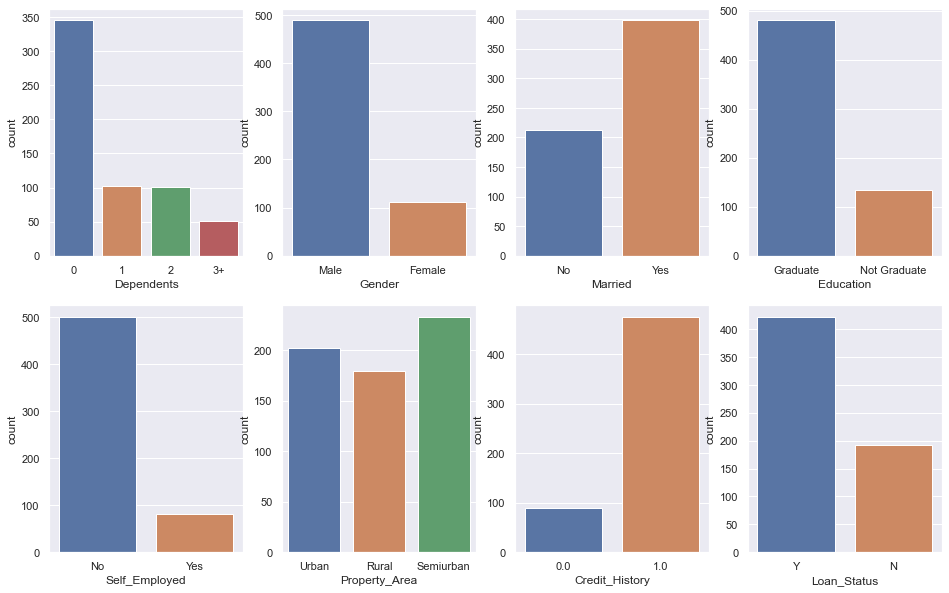

In [158]:
fig,ax = plt.subplots(2,4,figsize=(16,10))
sns.countplot('Dependents',data=train,ax=ax[0][0])
sns.countplot('Gender',data=train,ax=ax[0][1])
sns.countplot('Married',data=train,ax=ax[0][2])
sns.countplot('Education',data=train,ax=ax[0][3])
sns.countplot('Self_Employed',data=train,ax=ax[1][0])
sns.countplot('Property_Area',data=train,ax=ax[1][1])
sns.countplot('Credit_History',data=train,ax=ax[1][2])
sns.countplot('Loan_Status',data=train,ax=ax[1][3])

<AxesSubplot:>

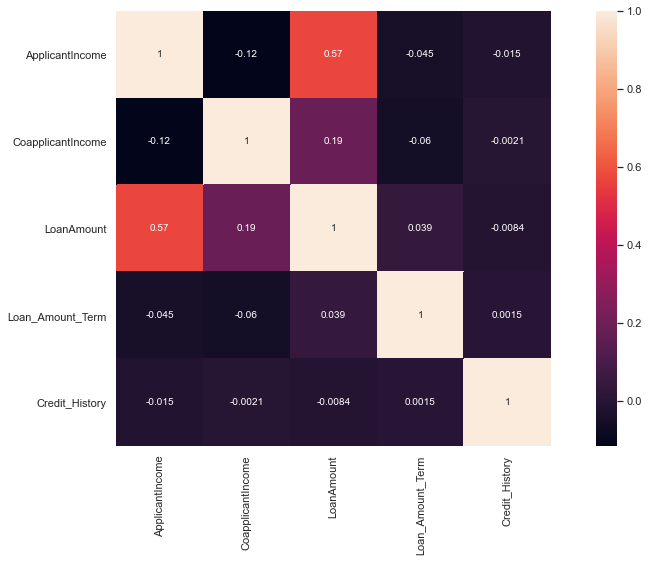

In [159]:

sns.heatmap(data=train.corr(),annot=True,square=True)

<AxesSubplot:xlabel='Gender', ylabel='count'>

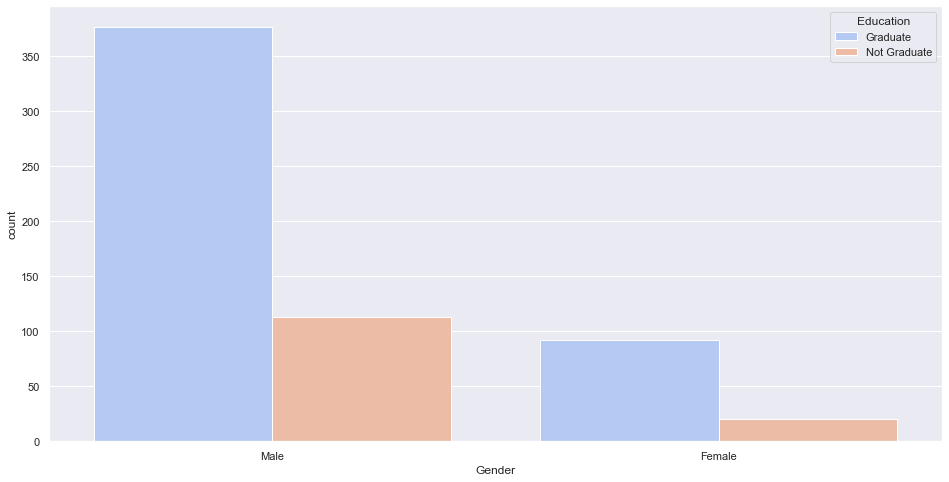

In [160]:
sns.countplot('Gender', hue = 'Education', data = train, palette = 'coolwarm')

<AxesSubplot:xlabel='Gender', ylabel='count'>

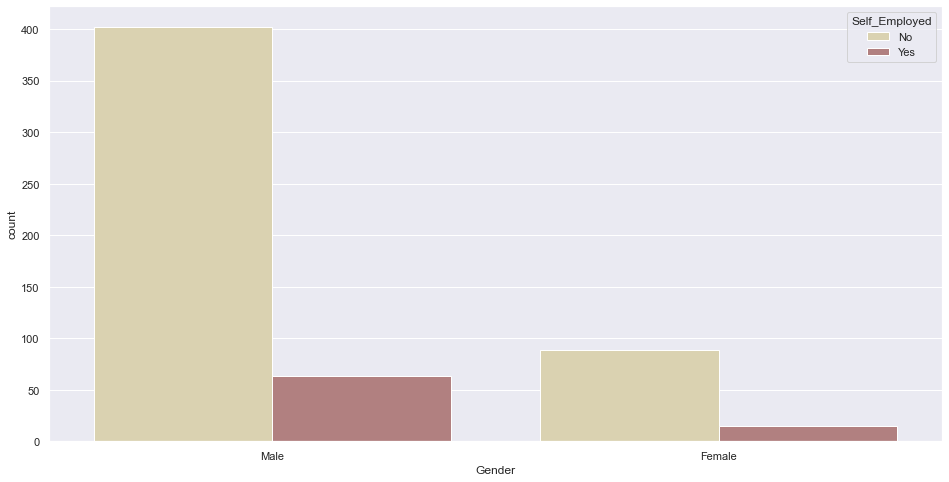

In [161]:
sns.countplot('Gender', hue = 'Self_Employed', data = train, palette = 'pink_r')

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

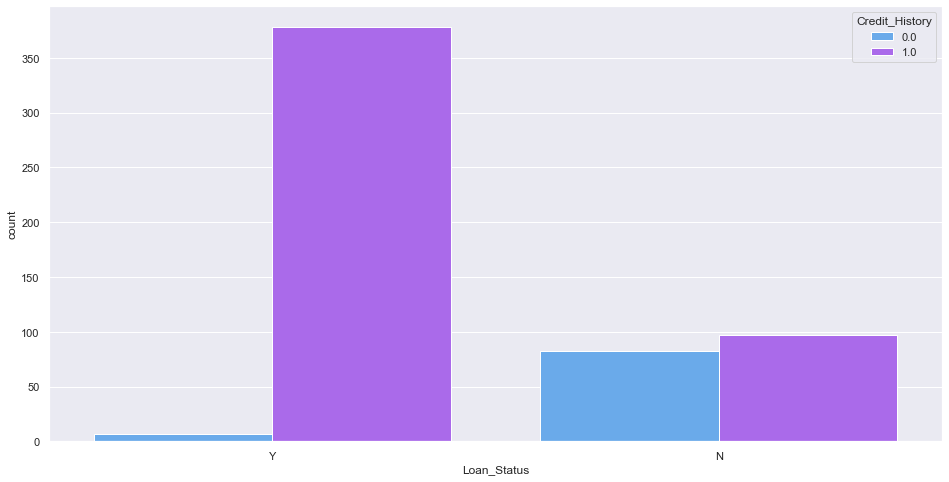

In [162]:
sns.countplot('Loan_Status', hue = 'Credit_History', data = train, palette = 'cool')

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

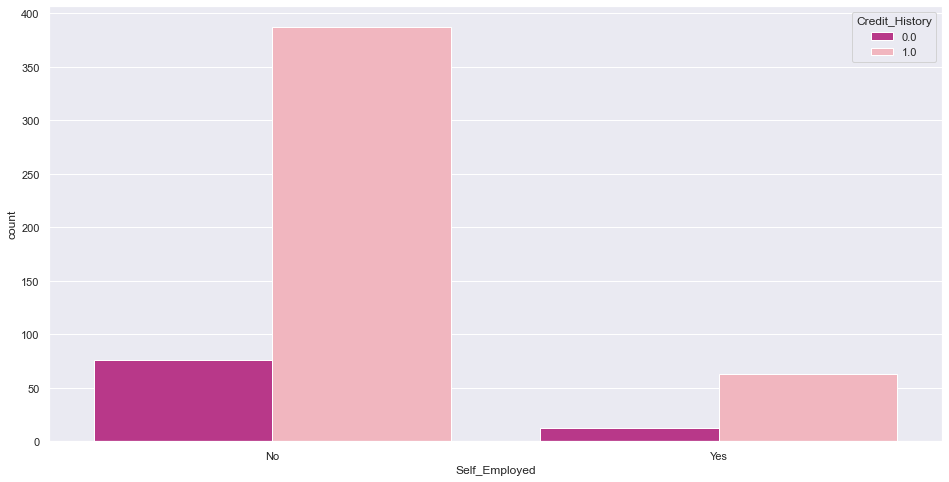

In [163]:
sns.countplot('Self_Employed', hue = 'Credit_History', data = train, palette = 'RdPu_r')

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

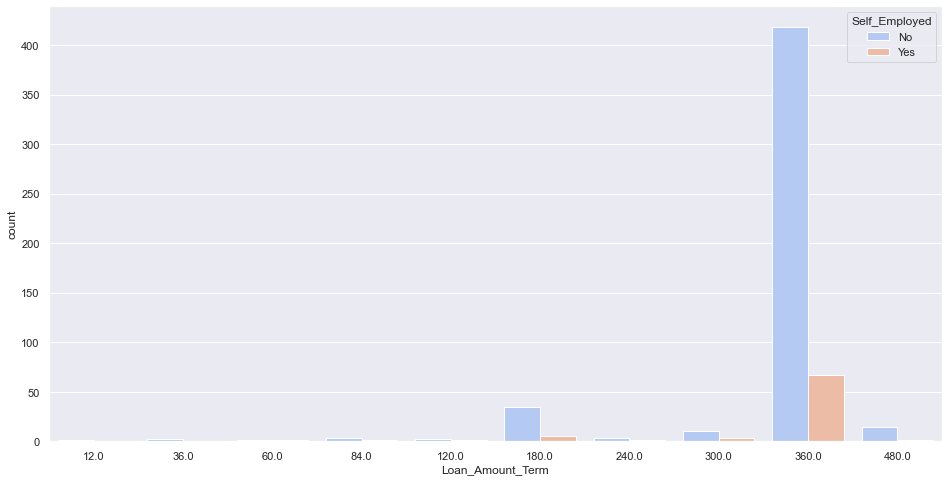

In [164]:
sns.countplot('Loan_Amount_Term', hue = 'Self_Employed', data = train, palette = 'coolwarm')

<AxesSubplot:xlabel='Dependents', ylabel='count'>

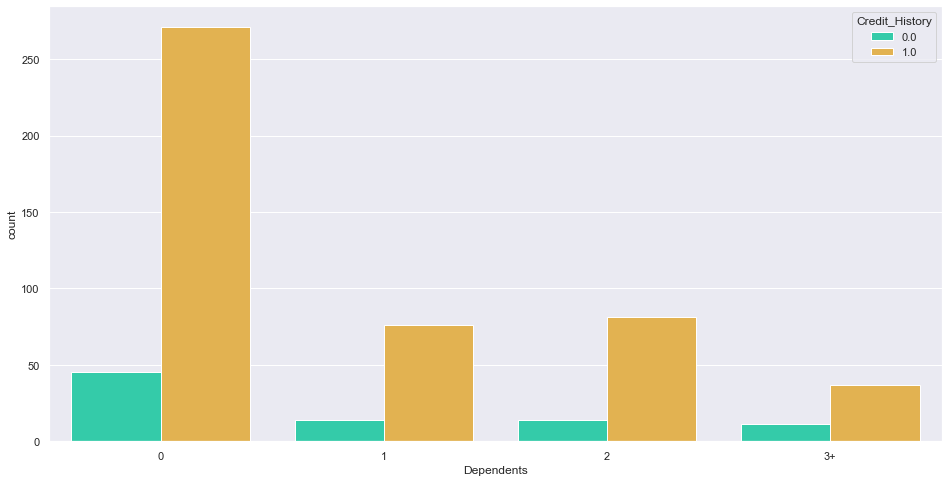

In [165]:
sns.countplot('Dependents', hue = 'Credit_History', data = train, palette = 'turbo')

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

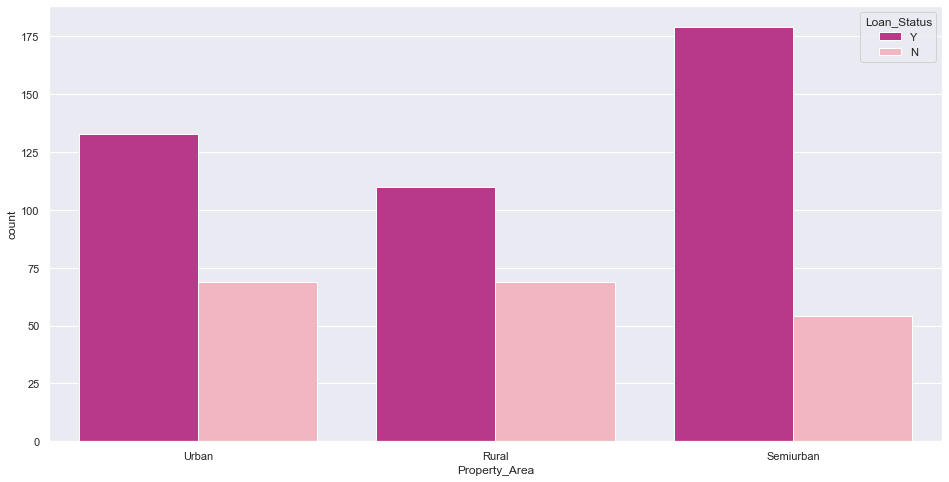

In [166]:
sns.countplot('Property_Area', hue = 'Loan_Status', data = train, palette = 'RdPu_r')

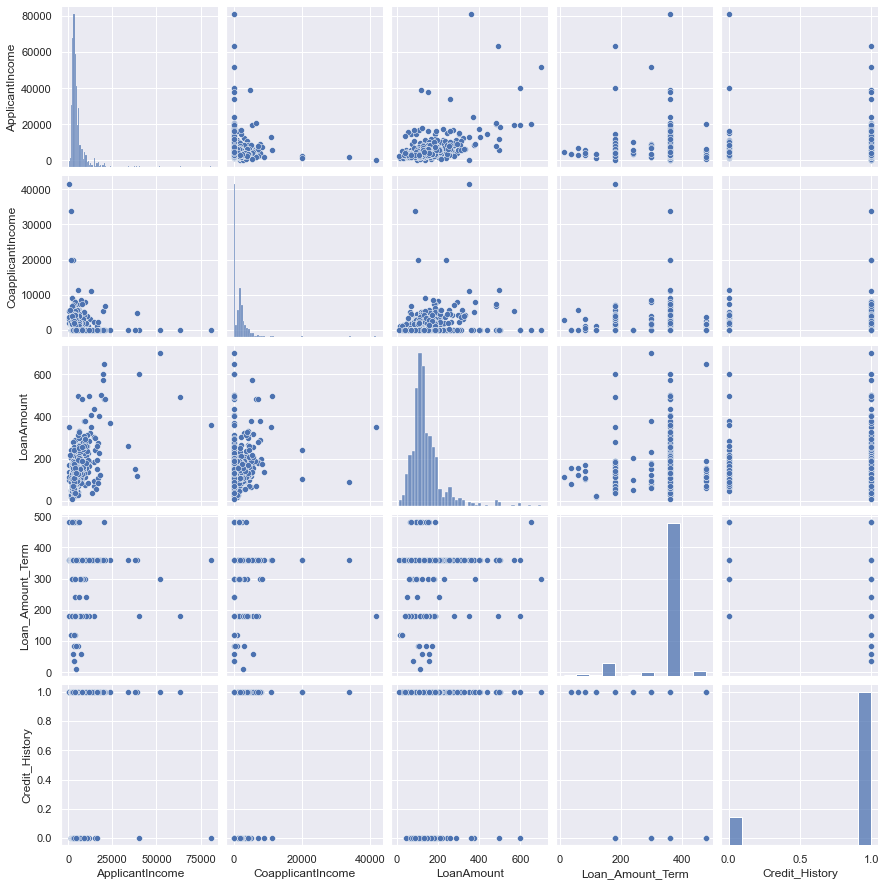

In [167]:
sns.pairplot(data = train)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Preprocessing of Train DataSet</h2>
</div>

- Handling "Gender" Variable
- Handling "Married" Variable 
- Handling "Education" Variable 
- Handling "Self_Employed" Variable 
- Handling "Property_Area" Variable 
- Handling "Loan_Status" Variable 
- Handling "Dependents" Variable 



#### * Handling of "Gender" Variable

In [168]:
print("-------------------------------------------------------------------------------------------------------------------")
print("****************Variable = Gender************In TRAIN Data************************************************************")

#train['Gender'].value_counts()

train['Gender']=train['Gender'].map({'Male':0, 'Female':1})

#print(train['Gender'])


-------------------------------------------------------------------------------------------------------------------
****************Variable = Gender************In TRAIN Data************************************************************


#### * Handling of "Married" Variable

In [169]:
print("-------------------------------------------------------------------------------------------------------------------")
print("****************Variable = Married************In TRAIN Data************************************************************")

#train['Married'].value_counts()

train['Married'] = train['Married'].map({'Yes':0, 'No':1})

#print(train['Married'])

-------------------------------------------------------------------------------------------------------------------
****************Variable = Married************In TRAIN Data************************************************************


#### * Handling of "Education" Variable

In [170]:
print("-------------------------------------------------------------------------------------------------------------------")
print("****************Variable = Education************In TRAIN Data************************************************************")

#train['Education'].value_counts()

train['Education'] = train['Education'].map({'Graduate':0, 'Not Graduate':1})

#print(train['Education'])

-------------------------------------------------------------------------------------------------------------------
****************Variable = Education************In TRAIN Data************************************************************


#### * Handling of "Self_Employed" Variable

In [171]:
print("-------------------------------------------------------------------------------------------------------------------")
print("****************Variable = Self_Employed************In TRAIN Data************************************************************")

#train['Self_Employed'].value_counts()

train['Self_Employed'] = train['Self_Employed'].map({'No':0, 'Yes':1})

#print(train['Self_Employed'])

-------------------------------------------------------------------------------------------------------------------
****************Variable = Self_Employed************In TRAIN Data************************************************************


#### * Handling of "Property_Area" Variable

In [172]:
print("-------------------------------------------------------------------------------------------------------------------")
print("****************Variable = Property_Area************In TRAIN Data************************************************************")

#train['Property_Area'].value_counts()

train['Property_Area'] = train['Property_Area'].map({'Semiurban':0, 'Urban':1, 'Rural':2})

#print(train['Property_Area'])

-------------------------------------------------------------------------------------------------------------------
****************Variable = Property_Area************In TRAIN Data************************************************************


#### * Handling of "Loan_Status" Variable

In [173]:
print("-------------------------------------------------------------------------------------------------------------------")
print("****************Variable = Loan_Status************In TRAIN Data************************************************************")

#train['Loan_Status'].value_counts()

train['Loan_Status'] = train['Loan_Status'].map({'Y':0, 'N':1})

#print(train['Loan_Status'])

-------------------------------------------------------------------------------------------------------------------
****************Variable = Loan_Status************In TRAIN Data************************************************************


#### * Handling of "Dependents" Variable

In [174]:
print("-------------------------------------------------------------------------------------------------------------------")
print("****************Variable = Dependents************In TRAIN Data************************************************************")

#print(train['Dependents'])

# Extract "Numerical" Value from "Dependents" Variable of "Train Data"
train['Dependents'] = train['Dependents'].str.split('+',expand=True)[0]

#print(train['Dependents'])

-------------------------------------------------------------------------------------------------------------------
****************Variable = Dependents************In TRAIN Data************************************************************


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Preprocessing of Test DataSet</h2>
</div>

- Handling "Gender" Variable
- Handling "Married" Variable 
- Handling "Education" Variable 
- Handling "Self_Employed" Variable 
- Handling "Property_Area" Variable 
- Handling "Dependents" Variable 



#### * Handling of "Gender" Variable

In [175]:
print("-------------------------------------------------------------------------------------------------------------------")
print("****************Variable = Gender************In test Data************************************************************")

#test['Gender'].value_counts()

test['Gender']=test['Gender'].map({'Male':0, 'Female':1})

#print(test['Gender'])


-------------------------------------------------------------------------------------------------------------------
****************Variable = Gender************In test Data************************************************************


#### * Handling of "Married" Variable

In [176]:
print("-------------------------------------------------------------------------------------------------------------------")
print("****************Variable = Married************In test Data************************************************************")

#test['Married'].value_counts()

test['Married'] = test['Married'].map({'Yes':0, 'No':1})

#print(test['Married'])

-------------------------------------------------------------------------------------------------------------------
****************Variable = Married************In test Data************************************************************


#### * Handling of "Education" Variable

In [177]:
print("-------------------------------------------------------------------------------------------------------------------")
print("****************Variable = Education************In test Data************************************************************")

#test['Education'].value_counts()

test['Education'] = test['Education'].map({'Graduate':0, 'Not Graduate':1})

#print(test['Education'])

-------------------------------------------------------------------------------------------------------------------
****************Variable = Education************In test Data************************************************************


#### * Handling of "Self_Employed" Variable

In [178]:
print("-------------------------------------------------------------------------------------------------------------------")
print("****************Variable = Self_Employed************In test Data************************************************************")

#test['Self_Employed'].value_counts()

test['Self_Employed'] = test['Self_Employed'].map({'No':0, 'Yes':1})

#print(test['Self_Employed'])

-------------------------------------------------------------------------------------------------------------------
****************Variable = Self_Employed************In test Data************************************************************


#### * Handling of "Property_Area" Variable

In [179]:
print("-------------------------------------------------------------------------------------------------------------------")
print("****************Variable = Property_Area************In test Data************************************************************")

#test['Property_Area'].value_counts()

test['Property_Area'] = test['Property_Area'].map({'Semiurban':0, 'Urban':1, 'Rural':2})

#print(test['Property_Area'])

-------------------------------------------------------------------------------------------------------------------
****************Variable = Property_Area************In test Data************************************************************


#### * Handling of "Dependents" Variable

In [180]:
print("-------------------------------------------------------------------------------------------------------------------")
print("****************Variable = Dependents************In test Data************************************************************")

#print(test['Dependents'])

# Extract "Numerical" Value from "Dependents" Variable of "test Data"
test['Dependents'] = test['Dependents'].str.split('+',expand=True)[0]

#print(test['Dependents'])

-------------------------------------------------------------------------------------------------------------------
****************Variable = Dependents************In test Data************************************************************


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Null Values in Train DataSet</h2>
</div>


In [181]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Imputation of Null Values in Train DataSet</h2>
</div>


#### * Imputation of "Gender" Variable

In [182]:
print("=========================Imputation of Gender============================================================")

train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)

print("******************************* Imputation of Gender Variable Completed***************************")
print("-----------------------------------------------------------------------------------------------------------------")


=========================Imputation of Gender============================================================
******************************* Imputation of Gender Variable Completed***************************
-----------------------------------------------------------------------------------------------------------------


#### * Imputation of "Married" Variable

In [183]:
print("=========================Imputation of Married============================================================")

train['Married'].fillna(train['Married'].mode()[0], inplace=True)

print("******************************* Imputation of Married Variable Completed***************************")
print("-----------------------------------------------------------------------------------------------------------------")


=========================Imputation of Married============================================================
******************************* Imputation of Married Variable Completed***************************
-----------------------------------------------------------------------------------------------------------------


#### * Imputation of "LoanAmount" Variable

In [184]:
print("=========================Imputation of LoanAmount============================================================")

# Check record having LoanAmount value as 159
# train[train['LoanAmount']==159]

# Average Loan Amount = 153 Calculated For Combination Married + Urban Property

train.loc[(train['LoanAmount'].isnull() & (train['Property_Area'] == 1)), 'LoanAmount'] = 153

# Average Loan Amount = 155 Calculated For Combination Married + Semi Urban Property

train.loc[(train['LoanAmount'].isnull() & (train['Property_Area'] == 0)), 'LoanAmount'] = 155

# Average Loan Amount = 159 Calculated For Combination Married + Rural Property

train.loc[(train['LoanAmount'].isnull() & (train['Property_Area'] == 2)), 'LoanAmount'] = 159

print("******************************* Imputation of LoanAmount Variable Completed***************************")
print("-----------------------------------------------------------------------------------------------------------------")


=========================Imputation of LoanAmount============================================================
******************************* Imputation of LoanAmount Variable Completed***************************
-----------------------------------------------------------------------------------------------------------------


#### * Imputation of "Credit_History" Variable

In [185]:
print("=========================Imputation of Credit_History============================================================")

train.loc[(train['Credit_History'].isnull() & (train['Loan_Status'] == 0)), 'Credit_History'] = 1

train.loc[(train['Credit_History'].isnull()),'Credit_History'] = 0

print("******************************* Imputation of Credit_History Variable Completed***************************")
print("-----------------------------------------------------------------------------------------------------------------")


=========================Imputation of Credit_History============================================================
******************************* Imputation of Credit_History Variable Completed***************************
-----------------------------------------------------------------------------------------------------------------


#### * Imputation of "Self_Employed" Variable

In [186]:
print("=========================Imputation of Self_Employed============================================================")

train.loc[(train['Self_Employed'].isnull() & (train['Credit_History'] == 1)), 'Self_Employed'] = 0
train.loc[(train['Self_Employed'].isnull()),'Self_Employed'] = 1

print("******************************* Imputation of Self_Employed Variable Completed***************************")
print("-----------------------------------------------------------------------------------------------------------------")


=========================Imputation of Self_Employed============================================================
******************************* Imputation of Self_Employed Variable Completed***************************
-----------------------------------------------------------------------------------------------------------------


#### * Imputation of "Dependents" Variable

In [187]:
print("=========================Imputation of Dependents============================================================")

train.loc[(train['Dependents'].isnull() & (train['Married'] == 0)), 'Dependents'] = 2
train.loc[(train['Dependents'].isnull() & (train['Married'] == 1)), 'Dependents'] = 1
train.loc[(train['Dependents'].isnull() & (train['Credit_History'] == 1)), 'Dependents'] = 0

print("******************************* Imputation of Dependents Variable Completed***************************")
print("-----------------------------------------------------------------------------------------------------------------")


=========================Imputation of Dependents============================================================
******************************* Imputation of Dependents Variable Completed***************************
-----------------------------------------------------------------------------------------------------------------


#### * Imputation of "Loan_Amount_Term" Variable

In [188]:
print("=========================Imputation of Loan_Amount_Term============================================================")

# Average Loan Amount Term = 336 calculated for Self_Employed = Yes

train.loc[(train['Loan_Amount_Term'].isnull() & (train['Self_Employed'] == 1)), 'Loan_Amount_Term'] = 336

# Average Loan Amount Term = 336 calculated for Self_Employed = No
train.loc[(train['Loan_Amount_Term'].isnull() & (train['Self_Employed'] == 0)), 'Loan_Amount_Term'] = 343

# Else Fill with "Mode" Value
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

print("******************************* Imputation of Loan_Amount_Term Variable Completed***************************")
print("-----------------------------------------------------------------------------------------------------------------")


=========================Imputation of Loan_Amount_Term============================================================
******************************* Imputation of Loan_Amount_Term Variable Completed***************************
-----------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Check Null Values in Test DataSet</h2>
</div>


In [189]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Imputation of Null Values in Test DataSet</h2>
</div>


#### * Imputation of "Gender" Variable

In [190]:
print("=========================Imputation of Gender============================================================")

test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)

print("******************************* Imputation of Gender Variable Completed***************************")
print("-----------------------------------------------------------------------------------------------------------------")


=========================Imputation of Gender============================================================
******************************* Imputation of Gender Variable Completed***************************
-----------------------------------------------------------------------------------------------------------------


#### * Imputation of "LoanAmount" Variable

In [191]:
print("=========================Imputation of LoanAmount============================================================")

# Check record having LoanAmount value as 149
# test[test['LoanAmount']==149]

# Average Loan Amount = 149 Calculated For Combination Married + Urban Property

test.loc[(test['LoanAmount'].isnull() & (test['Property_Area'] == 1)), 'LoanAmount'] = 149

# Average Loan Amount = 141 Calculated For Combination Married + Semi Urban Property

test.loc[(test['LoanAmount'].isnull() & (test['Property_Area'] == 0)), 'LoanAmount'] = 141

# Average Loan Amount = 143 Calculated For Combination Married + Rural Property

test.loc[(test['LoanAmount'].isnull() & (test['Property_Area'] == 2)), 'LoanAmount'] = 143


print("******************************* Imputation of LoanAmount Variable Completed***************************")
print("-----------------------------------------------------------------------------------------------------------------")


=========================Imputation of LoanAmount============================================================
******************************* Imputation of LoanAmount Variable Completed***************************
-----------------------------------------------------------------------------------------------------------------


#### * Imputation of "Credit_History" Variable

In [192]:
print("=========================Imputation of Credit_History============================================================")


# Count of Credit_Hist=1 was more when Married = Yes
test.loc[(test['Credit_History'].isnull() & (test['Married'] == 0)), 'Credit_History'] = 1

# Count of Credit_Hist=1 was more when Graduate = Yes
test.loc[(test['Credit_History'].isnull() & (test['Education'] == 0)), 'Credit_History'] = 1

test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)


print("******************************* Imputation of Credit_History Variable Completed***************************")
print("-----------------------------------------------------------------------------------------------------------------")


=========================Imputation of Credit_History============================================================
******************************* Imputation of Credit_History Variable Completed***************************
-----------------------------------------------------------------------------------------------------------------


#### * Imputation of "Self_Employed" Variable

In [193]:
print("=========================Imputation of Self_Employed============================================================")

test.loc[(test['Self_Employed'].isnull() & (test['Credit_History'] == 1)), 'Self_Employed'] = 0
test.loc[(test['Self_Employed'].isnull()),'Self_Employed'] = 1

print("******************************* Imputation of Self_Employed Variable Completed***************************")
print("-----------------------------------------------------------------------------------------------------------------")


=========================Imputation of Self_Employed============================================================
******************************* Imputation of Self_Employed Variable Completed***************************
-----------------------------------------------------------------------------------------------------------------


#### * Imputation of "Dependents" Variable

In [194]:
print("=========================Imputation of Dependents============================================================")

test.loc[(test['Dependents'].isnull() & (test['Married'] == 0)), 'Dependents'] = 1
test.loc[(test['Dependents'].isnull() & (test['Married'] == 1)), 'Dependents'] = 0


print("******************************* Imputation of Dependents Variable Completed***************************")
print("-----------------------------------------------------------------------------------------------------------------")


=========================Imputation of Dependents============================================================
******************************* Imputation of Dependents Variable Completed***************************
-----------------------------------------------------------------------------------------------------------------


#### * Imputation of "Loan_Amount_Term" Variable

In [195]:
print("=========================Imputation of Loan_Amount_Term============================================================")

# Average Loan Amount Term = 338 calculated for Self_Employed = Yes

test.loc[(test['Loan_Amount_Term'].isnull() & (test['Self_Employed'] == 1)), 'Loan_Amount_Term'] = 338

# Average Loan Amount Term = 344 calculated for Self_Employed = No
test.loc[(test['Loan_Amount_Term'].isnull() & (test['Self_Employed'] == 0)), 'Loan_Amount_Term'] = 344

print("******************************* Imputation of Loan_Amount_Term Variable Completed***************************")
print("-----------------------------------------------------------------------------------------------------------------")


=========================Imputation of Loan_Amount_Term============================================================
******************************* Imputation of Loan_Amount_Term Variable Completed***************************
-----------------------------------------------------------------------------------------------------------------


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Derived Features in Train DataSet</h2>
</div>


In [196]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

train['EMI']=train['LoanAmount']/train['Loan_Amount_Term'] 

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Derived Features in Test DataSet</h2>
</div>


In [197]:
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Train Data Visualization With Derived Features</h2>
</div>

- Understand more about "Train" Data along with Derived Features


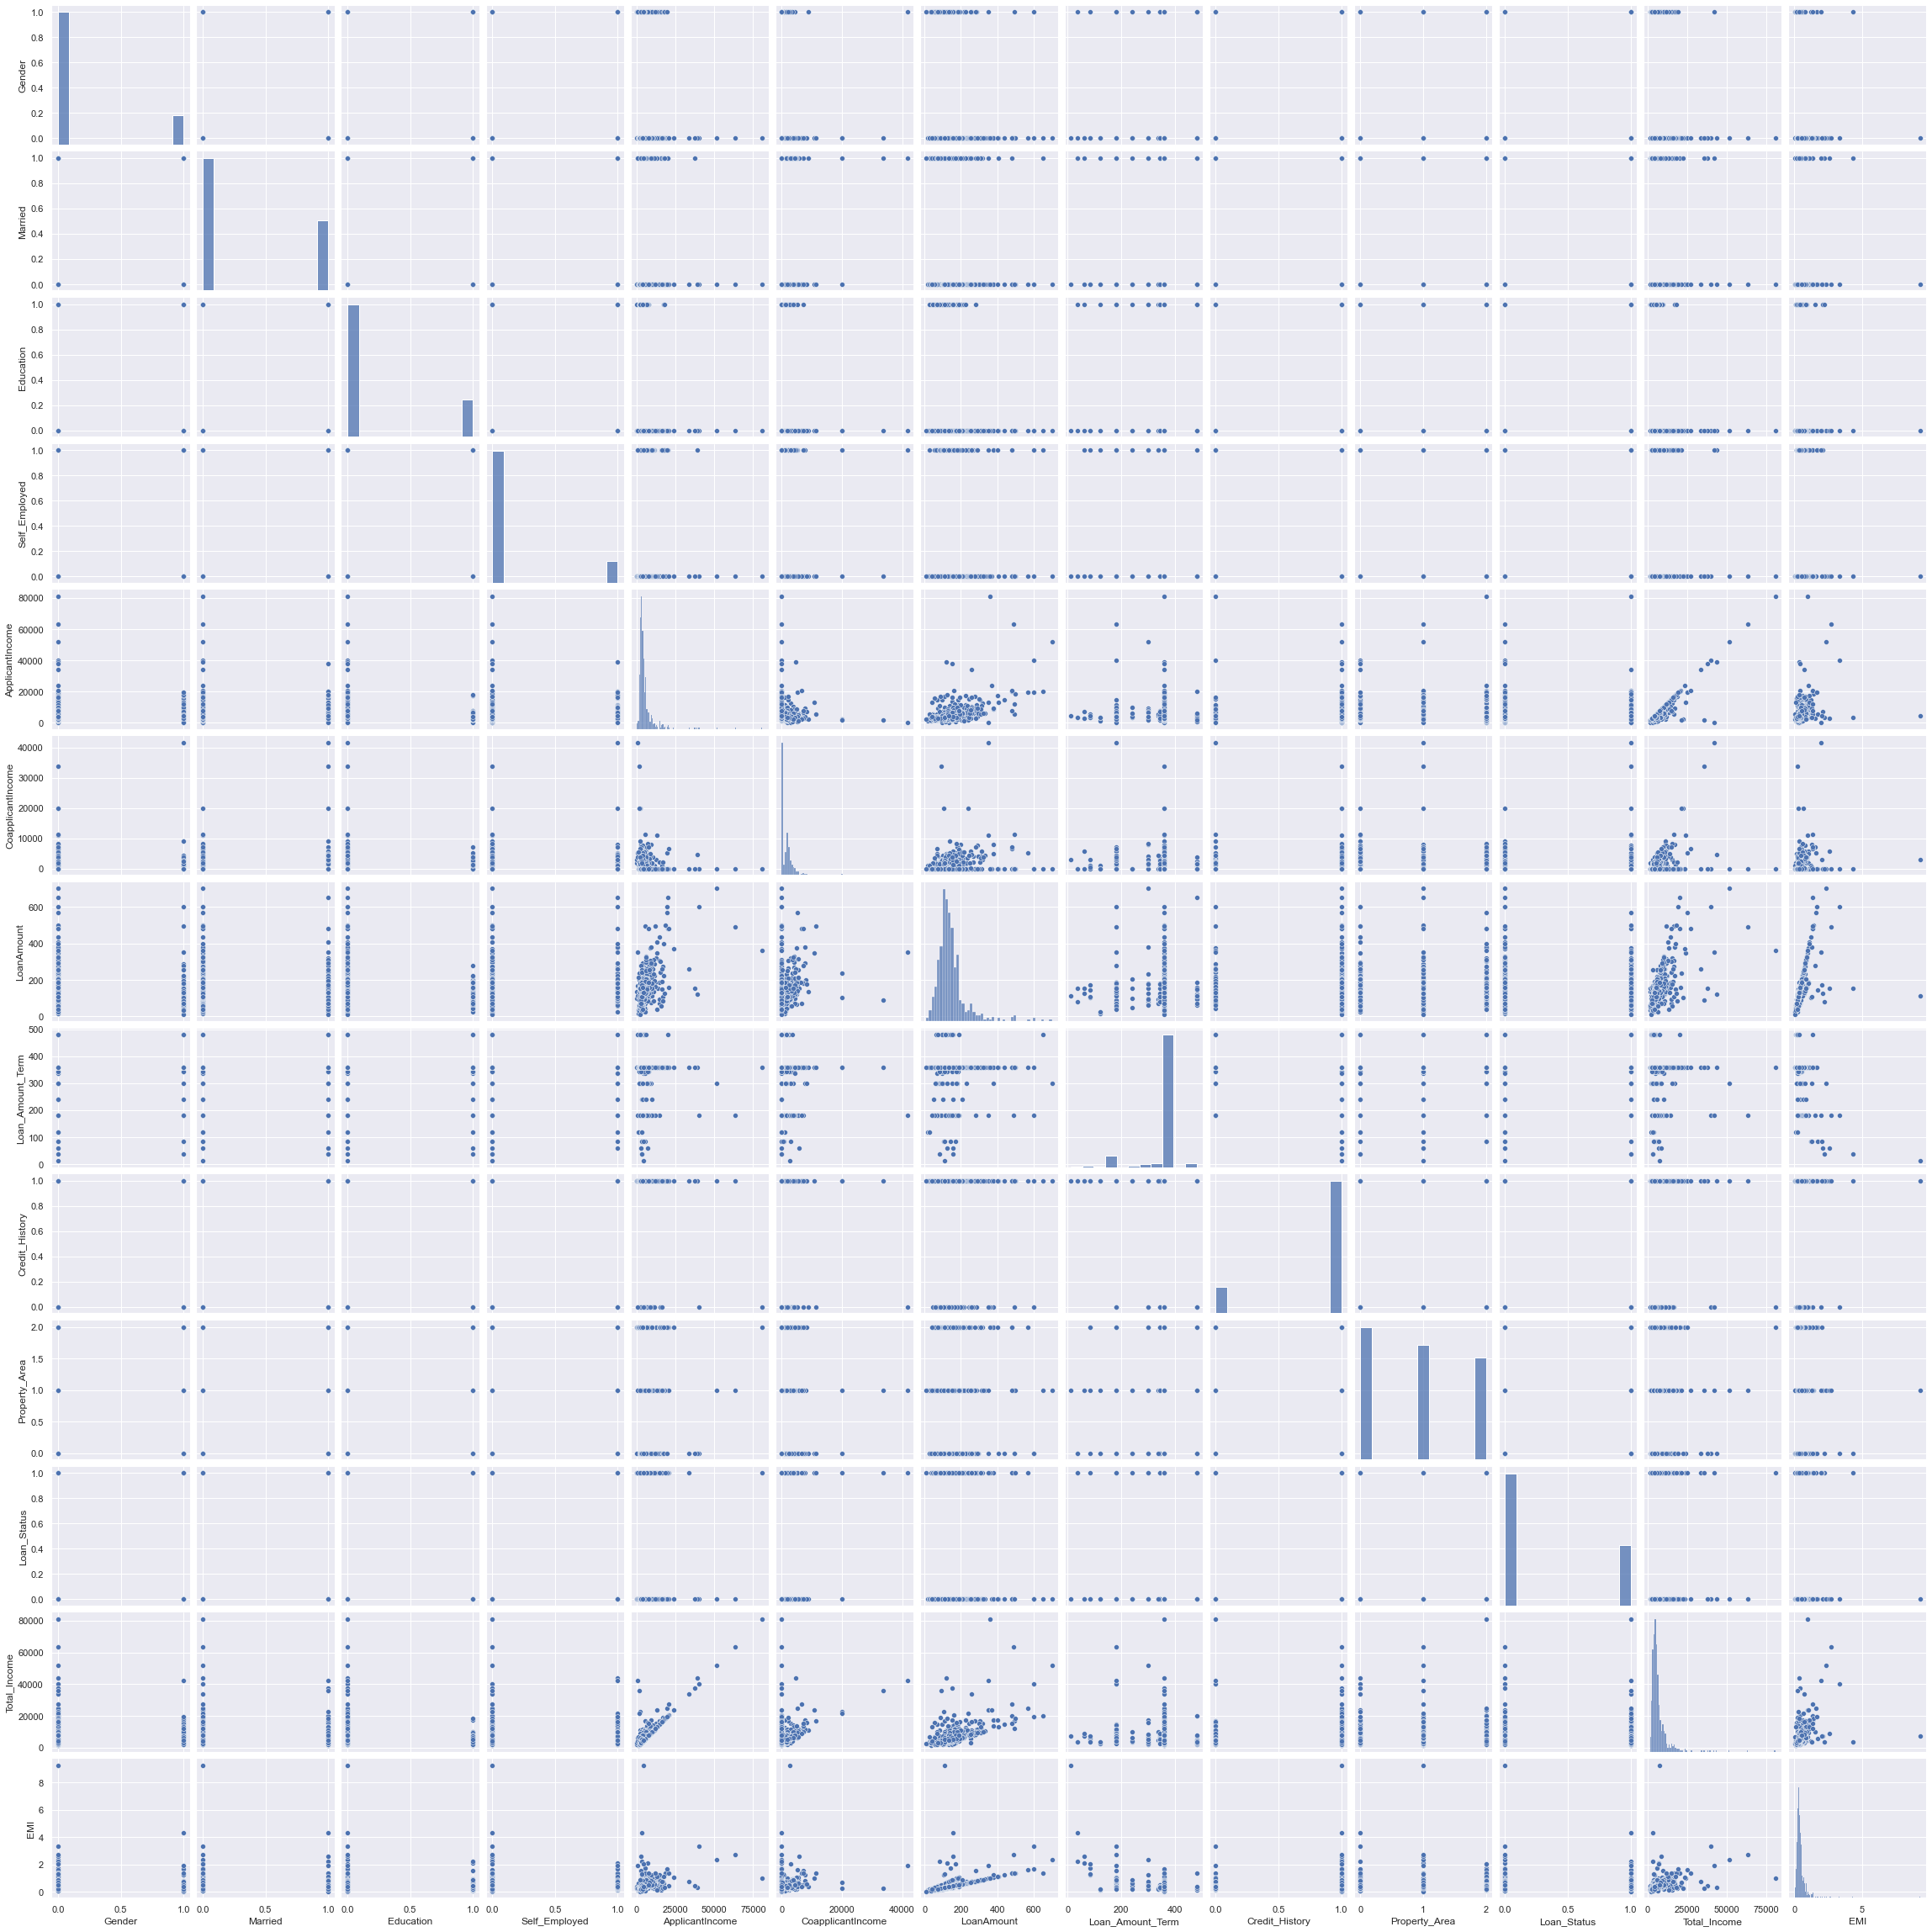

In [198]:
sns.pairplot(data = train)

<AxesSubplot:>

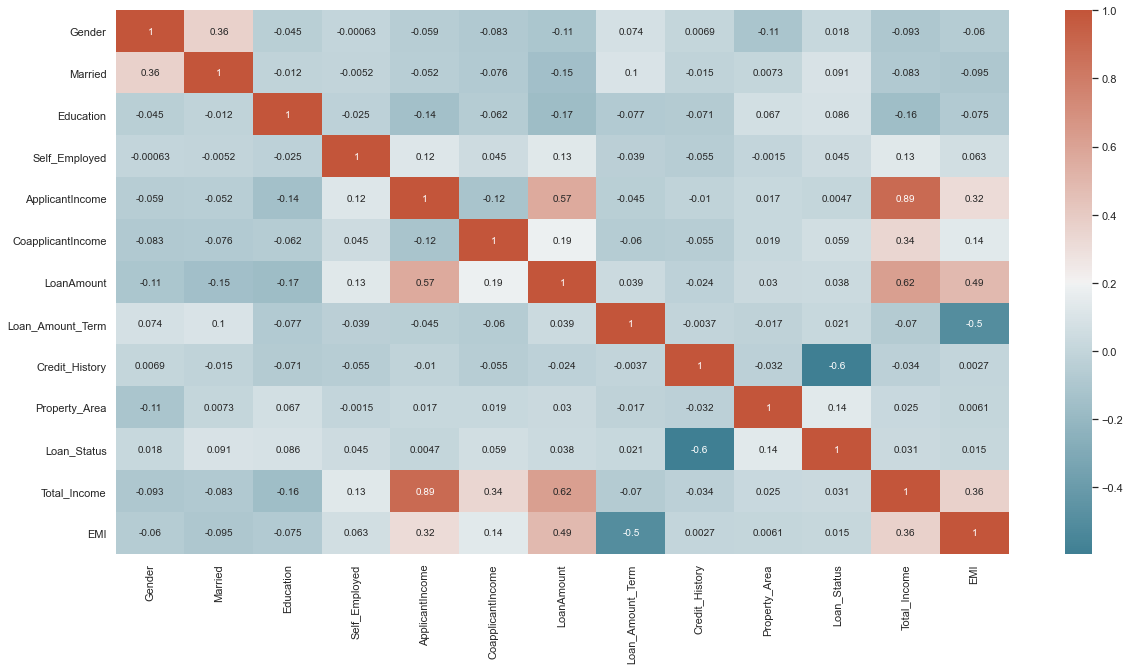

In [199]:
plt.figure(figsize=(20,10))
corr = train.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Drop Irrelevant Columns from Train and Test DataSet</h2>
</div>


In [200]:
train = train.drop(['Loan_ID'],axis=1)
print(train.head())
print("---------------------------------------------------------------------------------------------------------")
test = test.drop(['Loan_ID'],axis=1)
print(test.head())

print("---------------------------------------------------------------------------------------------------------")

   Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0     0.0      1.0          0          0            0.0             5849   
1     0.0      0.0          1          0            0.0             4583   
2     0.0      0.0          0          0            1.0             3000   
3     0.0      0.0          0          1            0.0             2583   
4     0.0      1.0          0          0            0.0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       153.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Property_Area  Loan_Status  Total_Income       EMI  
0              1            0        5849.0  0.425000  
1         

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Check Datatypes in Train and Test DataSet</h2>
</div>


In [201]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
 12  Total_Income       614 non-null    float64
 13  EMI                614 non-null    float64
dtypes: float64(9), int64(4), object(1)
memory usage: 67.3+ KB


In [202]:
train['Dependents'] = train['Dependents'].astype('int')

In [203]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    float64
 1   Married            367 non-null    int64  
 2   Dependents         367 non-null    object 
 3   Education          367 non-null    int64  
 4   Self_Employed      367 non-null    float64
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    int64  
 11  Total_Income       367 non-null    int64  
 12  EMI                367 non-null    float64
dtypes: float64(6), int64(6), object(1)
memory usage: 37.4+ KB


In [204]:
test['Dependents'] = test['Dependents'].astype('int')

In [205]:
print("Shape of Final Processed Train Data is:-\n",train.shape,'\n')
print("------------------------------------------------------------------------------------------------------------")

print("Shape of Final Processed Test Data is:-\n",test.shape,'\n')

print("------------------------------------------------------------------------------------------------------------")
print("\nColumns in the Final Processed Train Data\n",train.columns,'\n')

print("\nColumns in the Final Processed Train Data\n",test.columns,'\n')

print("------------------------------------------------------------------------------------------------------------")


Shape of Final Processed Train Data is:-
 (614, 14) 

------------------------------------------------------------------------------------------------------------
Shape of Final Processed Test Data is:-
 (367, 13) 

------------------------------------------------------------------------------------------------------------

Columns in the Final Processed Train Data
 Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income', 'EMI'],
      dtype='object') 


Columns in the Final Processed Train Data
 Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Total_Income',
       'EMI'],
      dtype='object') 

------------------------------------------------------------------------

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Preprocessing for Model Building</h2>
</div>


In [206]:
train_temp,test_temp=train_test_split(train,test_size=0.005,random_state=0)
print("Length of Original Data:-",len(train),"\nLength of Train Data:-",len(train_temp),"\nLength of Test Data:-",len(test_temp))

features=list(train.columns)
label='Loan_Status'

features.remove(label)

print("--------------------------------------------------------------------------------------------------------\n\n")
print("\nFEATURES ARE:-",features)

print("--------------------------------------------------------------------------------------------------------\n\n")
print("\nLABELS ARE:-",label)

print("--------------------------------------------------------------------------------------------------------\n\n")

# To check the data points in "Train" & "Test" datasets after split
X_train=train_temp[features]
y_train=train_temp[label]

X_test=test_temp[features]
y_test=test_temp[label]

Length of Original Data:- 614 
Length of Train Data:- 610 
Length of Test Data:- 4
--------------------------------------------------------------------------------------------------------



FEATURES ARE:- ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Total_Income', 'EMI']
--------------------------------------------------------------------------------------------------------



LABELS ARE:- Loan_Status
--------------------------------------------------------------------------------------------------------




<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Building Model- CatBoost Classifier</h2>
</div>

In [207]:
catb = CatBoostClassifier(max_depth=8, n_estimators=3000)

catb.fit(X_train,y_train) 

print('Accuracy of CatBoost Classifier on training set: {:.2f}'
     .format(catb.score(X_train, y_train)))

print('Accuracy of CatBoost Classifier on test set: {:.2f}'
     .format(catb.score(X_test, y_test)))

print("----------------------------------------------------------------------------------------------------------------------")

print('CatBoost Classification Report of the training data:\n\n',classification_report(y_test,catb.predict(X_test)),'\n')

Learning rate set to 0.003046
0:	learn: 0.6910667	total: 3.89ms	remaining: 11.7s
1:	learn: 0.6890555	total: 12.6ms	remaining: 18.9s
2:	learn: 0.6869615	total: 21.2ms	remaining: 21.1s
3:	learn: 0.6849652	total: 30ms	remaining: 22.5s
4:	learn: 0.6830830	total: 38.2ms	remaining: 22.9s
5:	learn: 0.6810834	total: 46.3ms	remaining: 23.1s
6:	learn: 0.6792409	total: 54.8ms	remaining: 23.4s
7:	learn: 0.6772163	total: 62.6ms	remaining: 23.4s
8:	learn: 0.6751543	total: 70.6ms	remaining: 23.5s
9:	learn: 0.6732797	total: 79ms	remaining: 23.6s
10:	learn: 0.6712472	total: 87.3ms	remaining: 23.7s
11:	learn: 0.6693632	total: 94.9ms	remaining: 23.6s
12:	learn: 0.6676150	total: 103ms	remaining: 23.6s
13:	learn: 0.6657699	total: 111ms	remaining: 23.6s
14:	learn: 0.6638887	total: 118ms	remaining: 23.6s
15:	learn: 0.6620073	total: 126ms	remaining: 23.5s
16:	learn: 0.6600432	total: 134ms	remaining: 23.5s
17:	learn: 0.6581431	total: 142ms	remaining: 23.6s
18:	learn: 0.6563008	total: 150ms	remaining: 23.6s
19:

171:	learn: 0.4778252	total: 1.56s	remaining: 25.7s
172:	learn: 0.4772111	total: 1.56s	remaining: 25.6s
173:	learn: 0.4764211	total: 1.57s	remaining: 25.5s
174:	learn: 0.4757140	total: 1.58s	remaining: 25.5s
175:	learn: 0.4749658	total: 1.59s	remaining: 25.5s
176:	learn: 0.4744749	total: 1.59s	remaining: 25.4s
177:	learn: 0.4736557	total: 1.6s	remaining: 25.4s
178:	learn: 0.4729594	total: 1.61s	remaining: 25.4s
179:	learn: 0.4721816	total: 1.62s	remaining: 25.4s
180:	learn: 0.4714640	total: 1.63s	remaining: 25.4s
181:	learn: 0.4707071	total: 1.64s	remaining: 25.3s
182:	learn: 0.4698410	total: 1.65s	remaining: 25.3s
183:	learn: 0.4690061	total: 1.65s	remaining: 25.3s
184:	learn: 0.4685191	total: 1.66s	remaining: 25.2s
185:	learn: 0.4678500	total: 1.66s	remaining: 25.2s
186:	learn: 0.4673100	total: 1.67s	remaining: 25.1s
187:	learn: 0.4666467	total: 1.68s	remaining: 25.1s
188:	learn: 0.4660335	total: 1.68s	remaining: 25s
189:	learn: 0.4654252	total: 1.69s	remaining: 25.1s
190:	learn: 0.4

334:	learn: 0.3938485	total: 2.79s	remaining: 22.2s
335:	learn: 0.3935165	total: 2.8s	remaining: 22.2s
336:	learn: 0.3931041	total: 2.8s	remaining: 22.2s
337:	learn: 0.3929457	total: 2.81s	remaining: 22.1s
338:	learn: 0.3925209	total: 2.81s	remaining: 22.1s
339:	learn: 0.3923073	total: 2.82s	remaining: 22s
340:	learn: 0.3919229	total: 2.82s	remaining: 22s
341:	learn: 0.3917335	total: 2.83s	remaining: 22s
342:	learn: 0.3915667	total: 2.83s	remaining: 21.9s
343:	learn: 0.3911726	total: 2.83s	remaining: 21.9s
344:	learn: 0.3909532	total: 2.84s	remaining: 21.8s
345:	learn: 0.3907861	total: 2.84s	remaining: 21.8s
346:	learn: 0.3904045	total: 2.85s	remaining: 21.8s
347:	learn: 0.3901090	total: 2.85s	remaining: 21.8s
348:	learn: 0.3897679	total: 2.86s	remaining: 21.7s
349:	learn: 0.3895276	total: 2.87s	remaining: 21.7s
350:	learn: 0.3890314	total: 2.88s	remaining: 21.7s
351:	learn: 0.3887728	total: 2.88s	remaining: 21.7s
352:	learn: 0.3884136	total: 2.89s	remaining: 21.7s
353:	learn: 0.387999

511:	learn: 0.3450659	total: 4.16s	remaining: 20.2s
512:	learn: 0.3447915	total: 4.17s	remaining: 20.2s
513:	learn: 0.3445817	total: 4.17s	remaining: 20.2s
514:	learn: 0.3443416	total: 4.18s	remaining: 20.2s
515:	learn: 0.3441965	total: 4.19s	remaining: 20.2s
516:	learn: 0.3439771	total: 4.2s	remaining: 20.2s
517:	learn: 0.3436760	total: 4.21s	remaining: 20.2s
518:	learn: 0.3433437	total: 4.21s	remaining: 20.1s
519:	learn: 0.3431606	total: 4.22s	remaining: 20.1s
520:	learn: 0.3428842	total: 4.23s	remaining: 20.1s
521:	learn: 0.3426388	total: 4.24s	remaining: 20.1s
522:	learn: 0.3423751	total: 4.25s	remaining: 20.1s
523:	learn: 0.3421860	total: 4.25s	remaining: 20.1s
524:	learn: 0.3419840	total: 4.26s	remaining: 20.1s
525:	learn: 0.3417896	total: 4.27s	remaining: 20.1s
526:	learn: 0.3415728	total: 4.28s	remaining: 20.1s
527:	learn: 0.3414374	total: 4.28s	remaining: 20.1s
528:	learn: 0.3412411	total: 4.29s	remaining: 20s
529:	learn: 0.3410612	total: 4.3s	remaining: 20s
530:	learn: 0.3407

675:	learn: 0.3131191	total: 5.56s	remaining: 19.1s
676:	learn: 0.3129032	total: 5.57s	remaining: 19.1s
677:	learn: 0.3126821	total: 5.57s	remaining: 19.1s
678:	learn: 0.3125668	total: 5.58s	remaining: 19.1s
679:	learn: 0.3123207	total: 5.59s	remaining: 19.1s
680:	learn: 0.3121245	total: 5.59s	remaining: 19.1s
681:	learn: 0.3119006	total: 5.6s	remaining: 19s
682:	learn: 0.3117251	total: 5.61s	remaining: 19s
683:	learn: 0.3115650	total: 5.62s	remaining: 19s
684:	learn: 0.3114713	total: 5.63s	remaining: 19s
685:	learn: 0.3112977	total: 5.63s	remaining: 19s
686:	learn: 0.3111068	total: 5.64s	remaining: 19s
687:	learn: 0.3109229	total: 5.65s	remaining: 19s
688:	learn: 0.3108289	total: 5.67s	remaining: 19s
689:	learn: 0.3106016	total: 5.68s	remaining: 19s
690:	learn: 0.3103862	total: 5.69s	remaining: 19s
691:	learn: 0.3102626	total: 5.71s	remaining: 19s
692:	learn: 0.3100952	total: 5.71s	remaining: 19s
693:	learn: 0.3099371	total: 5.72s	remaining: 19s
694:	learn: 0.3097856	total: 5.73s	rema

836:	learn: 0.2885440	total: 6.99s	remaining: 18.1s
837:	learn: 0.2883705	total: 7s	remaining: 18.1s
838:	learn: 0.2881856	total: 7.01s	remaining: 18.1s
839:	learn: 0.2880251	total: 7.02s	remaining: 18s
840:	learn: 0.2878721	total: 7.03s	remaining: 18s
841:	learn: 0.2876700	total: 7.03s	remaining: 18s
842:	learn: 0.2875294	total: 7.04s	remaining: 18s
843:	learn: 0.2873881	total: 7.05s	remaining: 18s
844:	learn: 0.2872664	total: 7.06s	remaining: 18s
845:	learn: 0.2871173	total: 7.06s	remaining: 18s
846:	learn: 0.2869624	total: 7.07s	remaining: 18s
847:	learn: 0.2867795	total: 7.08s	remaining: 18s
848:	learn: 0.2865662	total: 7.09s	remaining: 18s
849:	learn: 0.2864877	total: 7.09s	remaining: 17.9s
850:	learn: 0.2863755	total: 7.1s	remaining: 17.9s
851:	learn: 0.2862838	total: 7.11s	remaining: 17.9s
852:	learn: 0.2862195	total: 7.11s	remaining: 17.9s
853:	learn: 0.2859875	total: 7.12s	remaining: 17.9s
854:	learn: 0.2858956	total: 7.13s	remaining: 17.9s
855:	learn: 0.2857698	total: 7.14s	r

998:	learn: 0.2674504	total: 8.35s	remaining: 16.7s
999:	learn: 0.2672353	total: 8.36s	remaining: 16.7s
1000:	learn: 0.2670985	total: 8.37s	remaining: 16.7s
1001:	learn: 0.2669378	total: 8.38s	remaining: 16.7s
1002:	learn: 0.2667979	total: 8.39s	remaining: 16.7s
1003:	learn: 0.2666547	total: 8.4s	remaining: 16.7s
1004:	learn: 0.2665398	total: 8.4s	remaining: 16.7s
1005:	learn: 0.2663966	total: 8.41s	remaining: 16.7s
1006:	learn: 0.2663014	total: 8.42s	remaining: 16.7s
1007:	learn: 0.2662083	total: 8.43s	remaining: 16.7s
1008:	learn: 0.2660653	total: 8.44s	remaining: 16.6s
1009:	learn: 0.2659163	total: 8.45s	remaining: 16.6s
1010:	learn: 0.2658275	total: 8.45s	remaining: 16.6s
1011:	learn: 0.2656574	total: 8.46s	remaining: 16.6s
1012:	learn: 0.2654950	total: 8.47s	remaining: 16.6s
1013:	learn: 0.2653486	total: 8.48s	remaining: 16.6s
1014:	learn: 0.2651670	total: 8.48s	remaining: 16.6s
1015:	learn: 0.2649687	total: 8.49s	remaining: 16.6s
1016:	learn: 0.2649056	total: 8.57s	remaining: 16.

1157:	learn: 0.2490655	total: 10.4s	remaining: 16.5s
1158:	learn: 0.2489538	total: 10.4s	remaining: 16.5s
1159:	learn: 0.2488721	total: 10.5s	remaining: 16.6s
1160:	learn: 0.2488044	total: 10.5s	remaining: 16.6s
1161:	learn: 0.2487383	total: 10.5s	remaining: 16.6s
1162:	learn: 0.2487168	total: 10.5s	remaining: 16.6s
1163:	learn: 0.2485455	total: 10.5s	remaining: 16.6s
1164:	learn: 0.2484152	total: 10.5s	remaining: 16.6s
1165:	learn: 0.2483226	total: 10.6s	remaining: 16.6s
1166:	learn: 0.2482453	total: 10.6s	remaining: 16.6s
1167:	learn: 0.2480722	total: 10.6s	remaining: 16.6s
1168:	learn: 0.2479292	total: 10.6s	remaining: 16.6s
1169:	learn: 0.2478278	total: 10.6s	remaining: 16.6s
1170:	learn: 0.2477609	total: 10.6s	remaining: 16.6s
1171:	learn: 0.2476636	total: 10.6s	remaining: 16.6s
1172:	learn: 0.2475683	total: 10.6s	remaining: 16.6s
1173:	learn: 0.2474572	total: 10.6s	remaining: 16.5s
1174:	learn: 0.2473320	total: 10.6s	remaining: 16.5s
1175:	learn: 0.2471760	total: 10.7s	remaining:

1330:	learn: 0.2313242	total: 12.1s	remaining: 15.2s
1331:	learn: 0.2312550	total: 12.1s	remaining: 15.2s
1332:	learn: 0.2311325	total: 12.1s	remaining: 15.2s
1333:	learn: 0.2310635	total: 12.1s	remaining: 15.2s
1334:	learn: 0.2309621	total: 12.2s	remaining: 15.2s
1335:	learn: 0.2307903	total: 12.2s	remaining: 15.2s
1336:	learn: 0.2306835	total: 12.2s	remaining: 15.1s
1337:	learn: 0.2306273	total: 12.2s	remaining: 15.1s
1338:	learn: 0.2305563	total: 12.2s	remaining: 15.1s
1339:	learn: 0.2304636	total: 12.2s	remaining: 15.1s
1340:	learn: 0.2303906	total: 12.2s	remaining: 15.1s
1341:	learn: 0.2303607	total: 12.2s	remaining: 15.1s
1342:	learn: 0.2302305	total: 12.2s	remaining: 15.1s
1343:	learn: 0.2301646	total: 12.2s	remaining: 15.1s
1344:	learn: 0.2299928	total: 12.2s	remaining: 15s
1345:	learn: 0.2299881	total: 12.2s	remaining: 15s
1346:	learn: 0.2298604	total: 12.2s	remaining: 15s
1347:	learn: 0.2297566	total: 12.2s	remaining: 15s
1348:	learn: 0.2296623	total: 12.3s	remaining: 15s
134

1492:	learn: 0.2166971	total: 13.3s	remaining: 13.5s
1493:	learn: 0.2165708	total: 13.3s	remaining: 13.5s
1494:	learn: 0.2164878	total: 13.4s	remaining: 13.4s
1495:	learn: 0.2164652	total: 13.4s	remaining: 13.4s
1496:	learn: 0.2163279	total: 13.4s	remaining: 13.4s
1497:	learn: 0.2162509	total: 13.4s	remaining: 13.4s
1498:	learn: 0.2162018	total: 13.4s	remaining: 13.4s
1499:	learn: 0.2161577	total: 13.4s	remaining: 13.4s
1500:	learn: 0.2160441	total: 13.4s	remaining: 13.4s
1501:	learn: 0.2160083	total: 13.4s	remaining: 13.4s
1502:	learn: 0.2159051	total: 13.4s	remaining: 13.4s
1503:	learn: 0.2158169	total: 13.4s	remaining: 13.4s
1504:	learn: 0.2157665	total: 13.4s	remaining: 13.3s
1505:	learn: 0.2157186	total: 13.4s	remaining: 13.3s
1506:	learn: 0.2156652	total: 13.4s	remaining: 13.3s
1507:	learn: 0.2155446	total: 13.5s	remaining: 13.3s
1508:	learn: 0.2154692	total: 13.5s	remaining: 13.3s
1509:	learn: 0.2154128	total: 13.5s	remaining: 13.3s
1510:	learn: 0.2153236	total: 13.5s	remaining:

1668:	learn: 0.2019438	total: 14.7s	remaining: 11.8s
1669:	learn: 0.2018663	total: 14.7s	remaining: 11.7s
1670:	learn: 0.2018227	total: 14.8s	remaining: 11.7s
1671:	learn: 0.2017578	total: 14.8s	remaining: 11.7s
1672:	learn: 0.2016647	total: 14.8s	remaining: 11.7s
1673:	learn: 0.2015935	total: 14.8s	remaining: 11.7s
1674:	learn: 0.2015613	total: 14.8s	remaining: 11.7s
1675:	learn: 0.2015043	total: 14.8s	remaining: 11.7s
1676:	learn: 0.2014423	total: 14.8s	remaining: 11.7s
1677:	learn: 0.2013580	total: 14.8s	remaining: 11.7s
1678:	learn: 0.2012796	total: 14.8s	remaining: 11.7s
1679:	learn: 0.2011801	total: 14.8s	remaining: 11.7s
1680:	learn: 0.2010547	total: 14.8s	remaining: 11.6s
1681:	learn: 0.2009676	total: 14.8s	remaining: 11.6s
1682:	learn: 0.2008880	total: 14.9s	remaining: 11.6s
1683:	learn: 0.2008356	total: 14.9s	remaining: 11.6s
1684:	learn: 0.2007286	total: 14.9s	remaining: 11.6s
1685:	learn: 0.2005836	total: 14.9s	remaining: 11.6s
1686:	learn: 0.2005130	total: 14.9s	remaining:

1837:	learn: 0.1890246	total: 16.3s	remaining: 10.3s
1838:	learn: 0.1889442	total: 16.3s	remaining: 10.3s
1839:	learn: 0.1888694	total: 16.3s	remaining: 10.3s
1840:	learn: 0.1887911	total: 16.3s	remaining: 10.3s
1841:	learn: 0.1887173	total: 16.3s	remaining: 10.3s
1842:	learn: 0.1886581	total: 16.3s	remaining: 10.3s
1843:	learn: 0.1885859	total: 16.4s	remaining: 10.3s
1844:	learn: 0.1885251	total: 16.4s	remaining: 10.2s
1845:	learn: 0.1884227	total: 16.4s	remaining: 10.2s
1846:	learn: 0.1883569	total: 16.4s	remaining: 10.2s
1847:	learn: 0.1882597	total: 16.4s	remaining: 10.2s
1848:	learn: 0.1881724	total: 16.4s	remaining: 10.2s
1849:	learn: 0.1881083	total: 16.4s	remaining: 10.2s
1850:	learn: 0.1880675	total: 16.4s	remaining: 10.2s
1851:	learn: 0.1880149	total: 16.4s	remaining: 10.2s
1852:	learn: 0.1879613	total: 16.4s	remaining: 10.2s
1853:	learn: 0.1878874	total: 16.4s	remaining: 10.2s
1854:	learn: 0.1878003	total: 16.5s	remaining: 10.2s
1855:	learn: 0.1877409	total: 16.5s	remaining:

1994:	learn: 0.1777809	total: 17.9s	remaining: 9s
1995:	learn: 0.1776931	total: 17.9s	remaining: 9s
1996:	learn: 0.1775983	total: 17.9s	remaining: 8.99s
1997:	learn: 0.1775427	total: 17.9s	remaining: 8.98s
1998:	learn: 0.1774585	total: 17.9s	remaining: 8.97s
1999:	learn: 0.1773691	total: 17.9s	remaining: 8.96s
2000:	learn: 0.1772993	total: 17.9s	remaining: 8.95s
2001:	learn: 0.1772361	total: 17.9s	remaining: 8.94s
2002:	learn: 0.1771757	total: 17.9s	remaining: 8.93s
2003:	learn: 0.1771021	total: 18s	remaining: 8.92s
2004:	learn: 0.1770556	total: 18s	remaining: 8.91s
2005:	learn: 0.1770057	total: 18s	remaining: 8.9s
2006:	learn: 0.1769745	total: 18s	remaining: 8.89s
2007:	learn: 0.1768815	total: 18s	remaining: 8.88s
2008:	learn: 0.1768040	total: 18s	remaining: 8.88s
2009:	learn: 0.1767378	total: 18s	remaining: 8.87s
2010:	learn: 0.1766285	total: 18s	remaining: 8.86s
2011:	learn: 0.1765718	total: 18s	remaining: 8.85s
2012:	learn: 0.1765441	total: 18s	remaining: 8.84s
2013:	learn: 0.17650

2152:	learn: 0.1673165	total: 19.3s	remaining: 7.58s
2153:	learn: 0.1672431	total: 19.3s	remaining: 7.57s
2154:	learn: 0.1671223	total: 19.3s	remaining: 7.56s
2155:	learn: 0.1670292	total: 19.3s	remaining: 7.55s
2156:	learn: 0.1669958	total: 19.3s	remaining: 7.54s
2157:	learn: 0.1669278	total: 19.3s	remaining: 7.53s
2158:	learn: 0.1668903	total: 19.3s	remaining: 7.52s
2159:	learn: 0.1668233	total: 19.3s	remaining: 7.51s
2160:	learn: 0.1667610	total: 19.3s	remaining: 7.5s
2161:	learn: 0.1666513	total: 19.3s	remaining: 7.49s
2162:	learn: 0.1666119	total: 19.3s	remaining: 7.48s
2163:	learn: 0.1665476	total: 19.3s	remaining: 7.47s
2164:	learn: 0.1664631	total: 19.4s	remaining: 7.46s
2165:	learn: 0.1664230	total: 19.4s	remaining: 7.45s
2166:	learn: 0.1663596	total: 19.4s	remaining: 7.44s
2167:	learn: 0.1662853	total: 19.4s	remaining: 7.43s
2168:	learn: 0.1661946	total: 19.4s	remaining: 7.42s
2169:	learn: 0.1661555	total: 19.4s	remaining: 7.42s
2170:	learn: 0.1660740	total: 19.4s	remaining: 

2328:	learn: 0.1567692	total: 20.6s	remaining: 5.95s
2329:	learn: 0.1566974	total: 20.7s	remaining: 5.94s
2330:	learn: 0.1566392	total: 20.7s	remaining: 5.93s
2331:	learn: 0.1565967	total: 20.7s	remaining: 5.92s
2332:	learn: 0.1565032	total: 20.7s	remaining: 5.91s
2333:	learn: 0.1564772	total: 20.7s	remaining: 5.9s
2334:	learn: 0.1564094	total: 20.7s	remaining: 5.89s
2335:	learn: 0.1563713	total: 20.7s	remaining: 5.88s
2336:	learn: 0.1562945	total: 20.7s	remaining: 5.88s
2337:	learn: 0.1562197	total: 20.7s	remaining: 5.87s
2338:	learn: 0.1561804	total: 20.7s	remaining: 5.86s
2339:	learn: 0.1561338	total: 20.7s	remaining: 5.85s
2340:	learn: 0.1561000	total: 20.7s	remaining: 5.84s
2341:	learn: 0.1560504	total: 20.7s	remaining: 5.83s
2342:	learn: 0.1559784	total: 20.8s	remaining: 5.82s
2343:	learn: 0.1559208	total: 20.8s	remaining: 5.81s
2344:	learn: 0.1558826	total: 20.8s	remaining: 5.8s
2345:	learn: 0.1558519	total: 20.8s	remaining: 5.79s
2346:	learn: 0.1557704	total: 20.8s	remaining: 5

2493:	learn: 0.1474612	total: 22.4s	remaining: 4.55s
2494:	learn: 0.1474214	total: 22.4s	remaining: 4.54s
2495:	learn: 0.1473712	total: 22.5s	remaining: 4.54s
2496:	learn: 0.1473198	total: 22.5s	remaining: 4.53s
2497:	learn: 0.1472762	total: 22.5s	remaining: 4.52s
2498:	learn: 0.1472225	total: 22.5s	remaining: 4.51s
2499:	learn: 0.1471750	total: 22.5s	remaining: 4.5s
2500:	learn: 0.1470994	total: 22.5s	remaining: 4.5s
2501:	learn: 0.1470243	total: 22.6s	remaining: 4.49s
2502:	learn: 0.1469689	total: 22.6s	remaining: 4.48s
2503:	learn: 0.1469215	total: 22.6s	remaining: 4.48s
2504:	learn: 0.1468488	total: 22.6s	remaining: 4.47s
2505:	learn: 0.1468211	total: 22.6s	remaining: 4.46s
2506:	learn: 0.1467534	total: 22.7s	remaining: 4.46s
2507:	learn: 0.1466686	total: 22.7s	remaining: 4.45s
2508:	learn: 0.1466255	total: 22.7s	remaining: 4.44s
2509:	learn: 0.1465525	total: 22.7s	remaining: 4.44s
2510:	learn: 0.1465111	total: 22.8s	remaining: 4.43s
2511:	learn: 0.1464507	total: 22.8s	remaining: 4

2649:	learn: 0.1397294	total: 24.3s	remaining: 3.21s
2650:	learn: 0.1396986	total: 24.3s	remaining: 3.2s
2651:	learn: 0.1396606	total: 24.3s	remaining: 3.19s
2652:	learn: 0.1396071	total: 24.4s	remaining: 3.19s
2653:	learn: 0.1395074	total: 24.4s	remaining: 3.18s
2654:	learn: 0.1394798	total: 24.4s	remaining: 3.17s
2655:	learn: 0.1394628	total: 24.4s	remaining: 3.16s
2656:	learn: 0.1394081	total: 24.4s	remaining: 3.15s
2657:	learn: 0.1393817	total: 24.4s	remaining: 3.14s
2658:	learn: 0.1393285	total: 24.4s	remaining: 3.13s
2659:	learn: 0.1392797	total: 24.4s	remaining: 3.12s
2660:	learn: 0.1392474	total: 24.4s	remaining: 3.11s
2661:	learn: 0.1392171	total: 24.4s	remaining: 3.1s
2662:	learn: 0.1391528	total: 24.4s	remaining: 3.09s
2663:	learn: 0.1391072	total: 24.5s	remaining: 3.08s
2664:	learn: 0.1390621	total: 24.5s	remaining: 3.08s
2665:	learn: 0.1390160	total: 24.5s	remaining: 3.07s
2666:	learn: 0.1389834	total: 24.5s	remaining: 3.06s
2667:	learn: 0.1389396	total: 24.5s	remaining: 3

2826:	learn: 0.1318278	total: 25.9s	remaining: 1.58s
2827:	learn: 0.1317707	total: 25.9s	remaining: 1.57s
2828:	learn: 0.1317457	total: 25.9s	remaining: 1.56s
2829:	learn: 0.1316866	total: 25.9s	remaining: 1.56s
2830:	learn: 0.1316633	total: 25.9s	remaining: 1.55s
2831:	learn: 0.1316073	total: 25.9s	remaining: 1.54s
2832:	learn: 0.1315700	total: 25.9s	remaining: 1.53s
2833:	learn: 0.1315242	total: 25.9s	remaining: 1.52s
2834:	learn: 0.1315128	total: 25.9s	remaining: 1.51s
2835:	learn: 0.1314834	total: 26s	remaining: 1.5s
2836:	learn: 0.1314402	total: 26s	remaining: 1.49s
2837:	learn: 0.1314153	total: 26s	remaining: 1.48s
2838:	learn: 0.1313817	total: 26s	remaining: 1.47s
2839:	learn: 0.1313483	total: 26s	remaining: 1.46s
2840:	learn: 0.1312790	total: 26s	remaining: 1.45s
2841:	learn: 0.1312548	total: 26s	remaining: 1.45s
2842:	learn: 0.1312272	total: 26s	remaining: 1.44s
2843:	learn: 0.1311892	total: 26s	remaining: 1.43s
2844:	learn: 0.1310883	total: 26s	remaining: 1.42s
2845:	learn: 0

2999:	learn: 0.1240701	total: 27.3s	remaining: 0us
Accuracy of CatBoost Classifier on training set: 0.98
Accuracy of CatBoost Classifier on test set: 0.50
----------------------------------------------------------------------------------------------------------------------
CatBoost Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4
 



<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Predict Target Variable using Tuned Model</h2>
</div>

In [208]:
# Import Test data for the prediction of the Target Variable
x = np.array(test)

# Prediction using above Tuned Mode

y_pred = catb.predict(x)

print(y_pred)

[0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1
 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0
 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Prepare Submission File in required format</h2>
</div>

In [209]:
# Save in Dataframe
df1=pd.DataFrame(y_pred,columns=['Loan_Status'])

# Reverse Mapping as per required format
df1['Loan_Status'] = df1['Loan_Status'].map({0:'Y', 1:'N'})


a=pd.Series(submission['Loan_ID'],name='Loan_ID')

final_pred = pd.concat([a,df1], axis=1) 

final_pred.head()

final_pred.to_csv('C:/Users/PC/Pictures/AV/LOAN_PRED_JUNE2022/Loan_Eligibility_Model_Aniiket_Barphe.csv',index=False)


print("Process Completed")


Process Completed


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Summary</h2>
</div>

Best Submission Score: 0.8055555556

Best Model: CatBoost Classifier

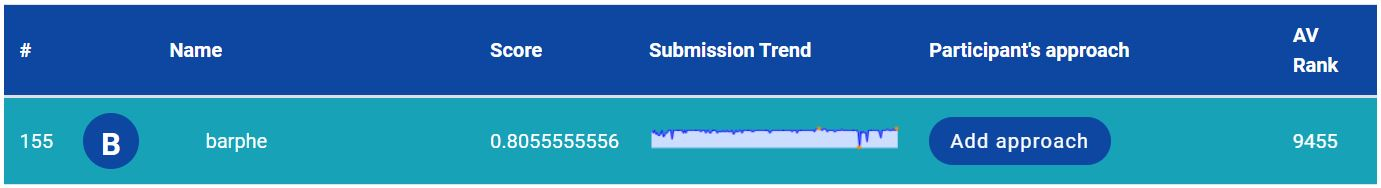

Competition Link: https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

Rank Scored: 155 out of 75084 participants as on 26 June 2022